In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

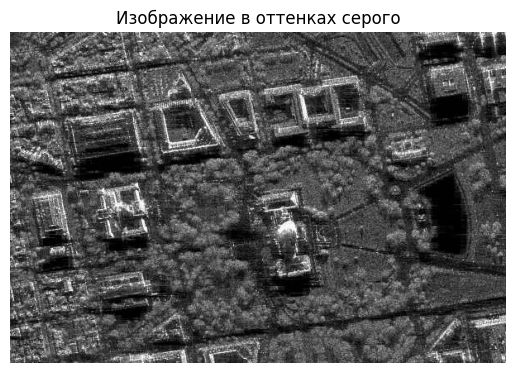

In [2]:
# 1. Загрузка изображения в оттенках серого sar_1_gray.jpg
image = cv2.imread('C:/ImageProcessing/labs/Intro_Color_models/sar_1_gray.jpg')
if image is None:
    print("Изображение не найдено")
    exit()

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.title('Изображение в оттенках серого')
plt.axis('off')
plt.show()

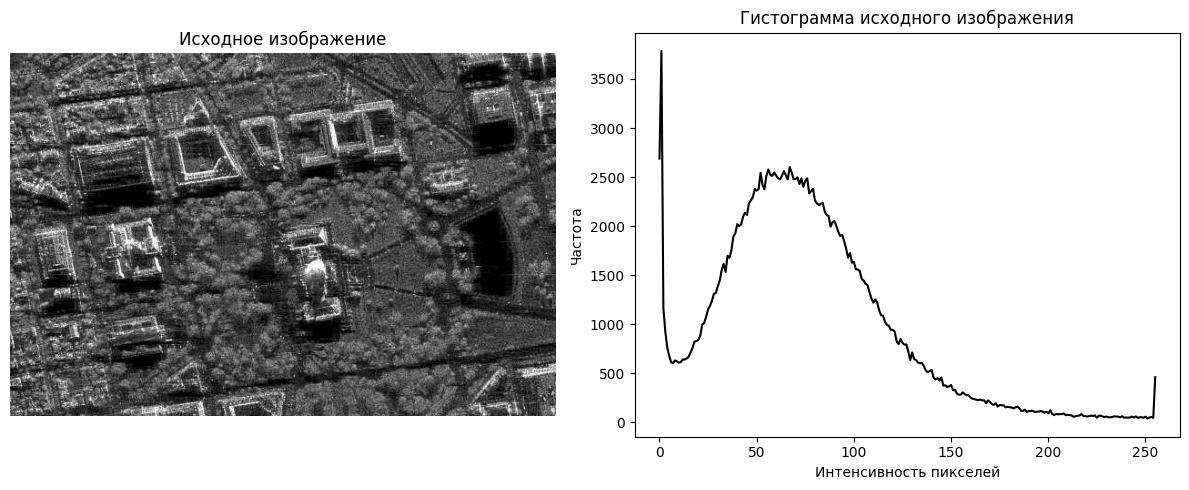

In [4]:
# 2. Построение гистограммы
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
histSize = 256
histRange = (0, 256)
accumulate = False

hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(hist, color='black')
plt.title('Гистограмма исходного изображения')
plt.xlabel('Интенсивность пикселей') # значения яркости пикселей
plt.ylabel('Частота') # количество пикселей

plt.tight_layout()
plt.show()

In [5]:
# 3. Реализация алгоритма гамма коррекции с параметром гамма <1, >1
# Формула гамма-коррекции: R_corrected = (R_uncorrected / R_max) ^ gamma * R_max
def gamma_correction(image, gamma):
    R_max = 255.0
    R_uncorrected = image.astype(np.float32)
    R_corrected = np.power(R_uncorrected / R_max, gamma) * R_max

    return R_corrected.astype(np.uint8)

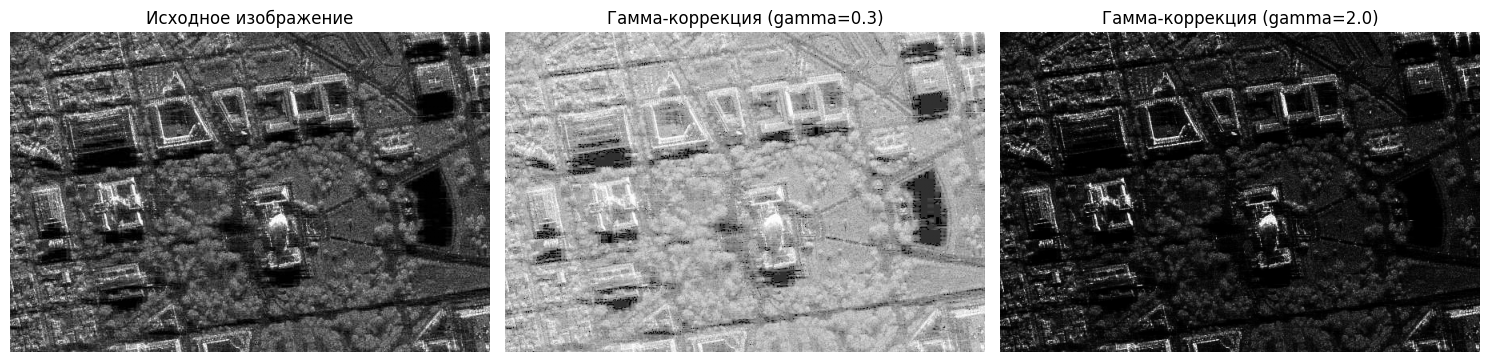

In [8]:
gamma_1 = 0.3
gamma_2 = 2.0

image_gamma_1 = gamma_correction(image_gray, gamma_1)
image_gamma_2 = gamma_correction(image_gray, gamma_2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_gamma_1, cmap='gray')
plt.title(f'Гамма-коррекция (gamma={gamma_1})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_gamma_2, cmap='gray')
plt.title(f'Гамма-коррекция (gamma={gamma_2})')
plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# 4. Сравнение исходного изображения, скорректированного при помощи гамма-фильтра. MSE, SSIM
# MSE - среднеквадратичная ошибка, измеряет среднюю величину ошибки между пикселями
# SSIM - индекс структурного сходства, измеряет воспринимаемое качество и структурное сходство
print("Сравнение гамма-коррекции:")

mse_1 = mean_squared_error(image_gray, image_gamma_1)
ssim_1 = structural_similarity(image_gray, image_gamma_1)

mse_2 = mean_squared_error(image_gray, image_gamma_2)
ssim_2 = structural_similarity(image_gray, image_gamma_2)

print(f"Гамма gamma = {gamma_1}:")
print(f"MSE: {mse_1:.4f}")
print(f"SSIM: {ssim_1:.4f}")
print()

print(f"Гамма gamma = {gamma_2}:")
print(f"MSE: {mse_2:.4f}")
print(f"SSIM: {ssim_2:.4f}")
print()

Сравнение гамма-коррекции:
Гамма gamma = 0.3:
MSE: 8929.8311
SSIM: 0.6219

Гамма gamma = 2.0:
MSE: 2383.7636
SSIM: 0.5270



In [7]:
# 5. Реализация алгоритма статистической цветокоррекции на основе статистики eq_gray

def statistical_correction(image, reference_image):
    current_mean = np.mean(image) # средняя яркость всех пикселей
    current_std = np.std(image) # мера контрастности
    
    ref_mean = np.mean(reference_image)
    ref_std = np.std(reference_image)
    
    corrected = (image - current_mean) * (ref_std / current_std) + ref_mean
    
    corrected = np.clip(corrected, 0, 255)
    
    return corrected.astype(np.uint8)

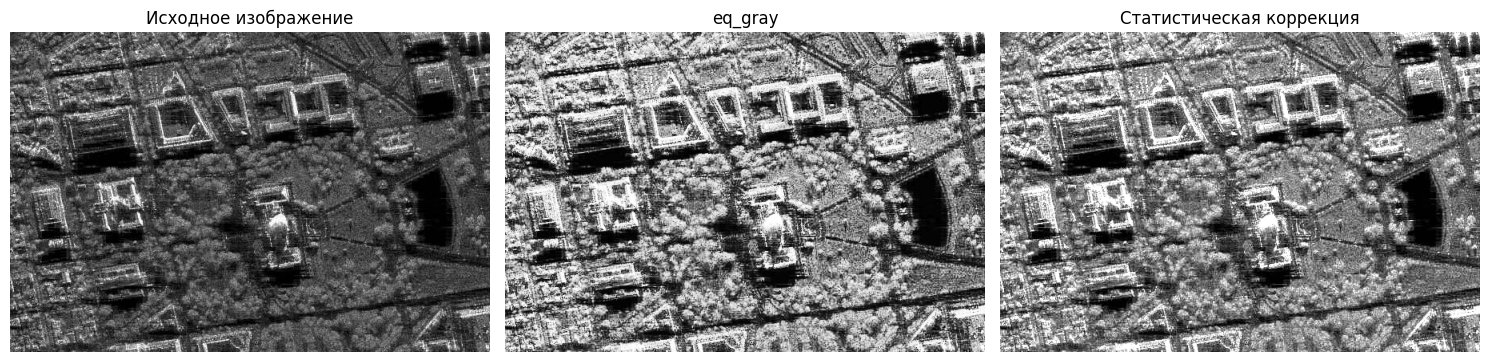

Сравнение статистической коррекции:
MSE: 2946.7009
SSIM: 0.7862



In [8]:
eq_gray = cv2.equalizeHist(image_gray)
image_stat_corrected = statistical_correction(image_gray, eq_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')

plt.tight_layout()
plt.show()

# Сравнение статистической коррекции
mse_stat = mean_squared_error(image_gray, image_stat_corrected)
ssim_stat = structural_similarity(image_gray, image_stat_corrected)

print("Сравнение статистической коррекции:")
print(f"MSE: {mse_stat:.4f}")
print(f"SSIM: {ssim_stat:.4f}")
print()

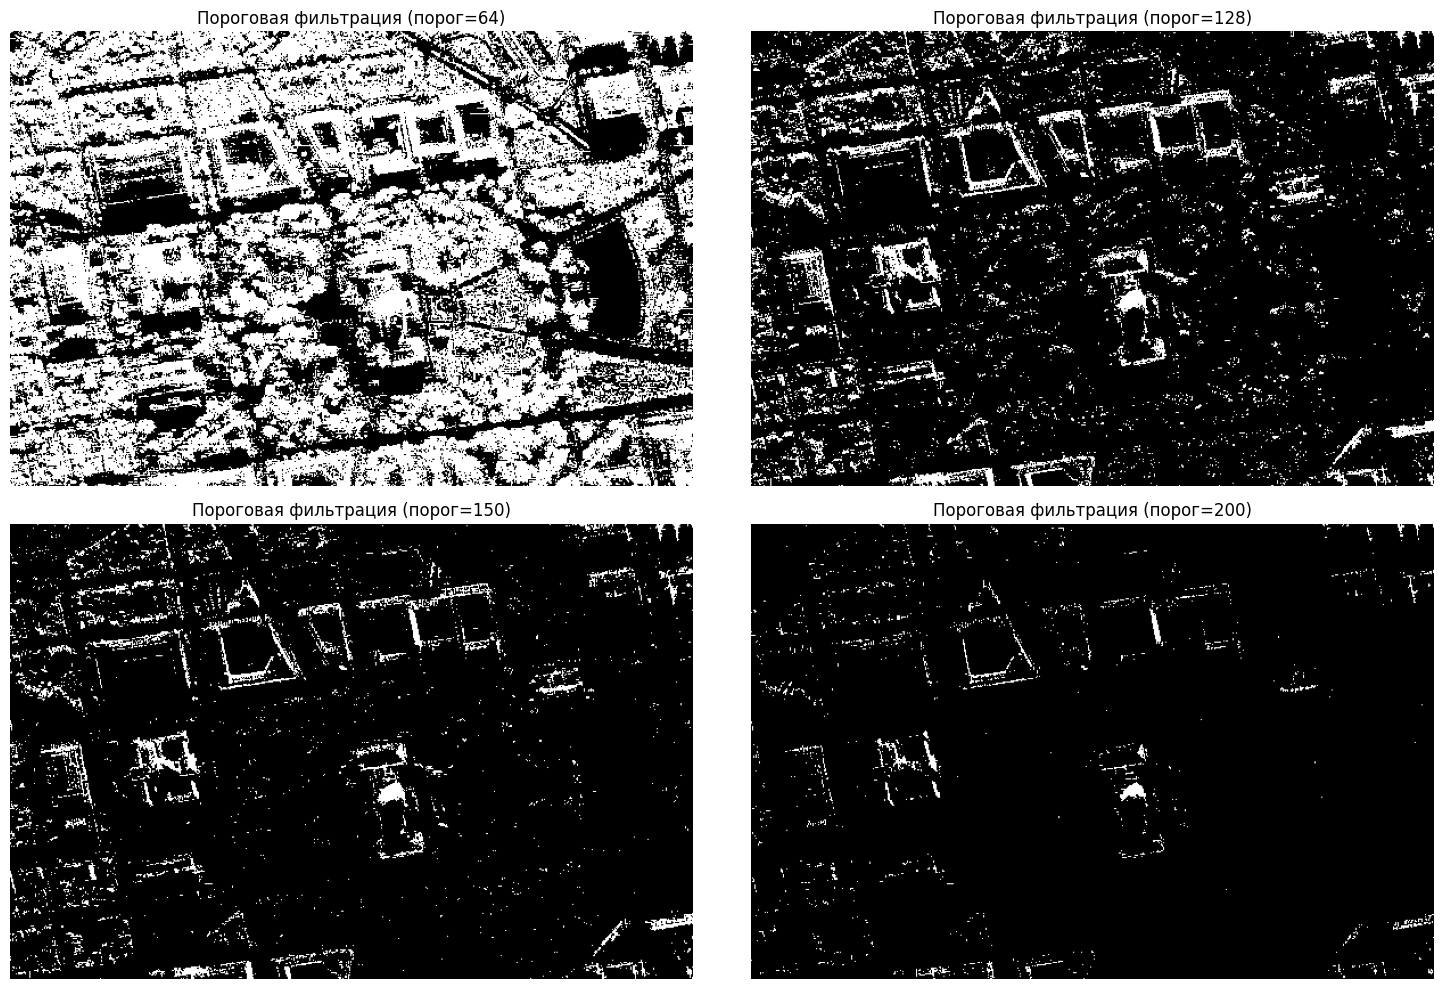

In [9]:
# 6. Тестирование работы алгоритмов пороговой фильтрации с различными параметрами
thresholds = [64, 128, 150, 200]

plt.figure(figsize=(15, 10))

for i, threshold_value in enumerate(thresholds):
    _, thresh1 = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)
    
    plt.subplot(2, 2, i+1)
    plt.imshow(thresh1, cmap='gray')
    plt.title(f'Пороговая фильтрация (порог={threshold_value})')
    plt.axis('off')

plt.tight_layout()
plt.show()

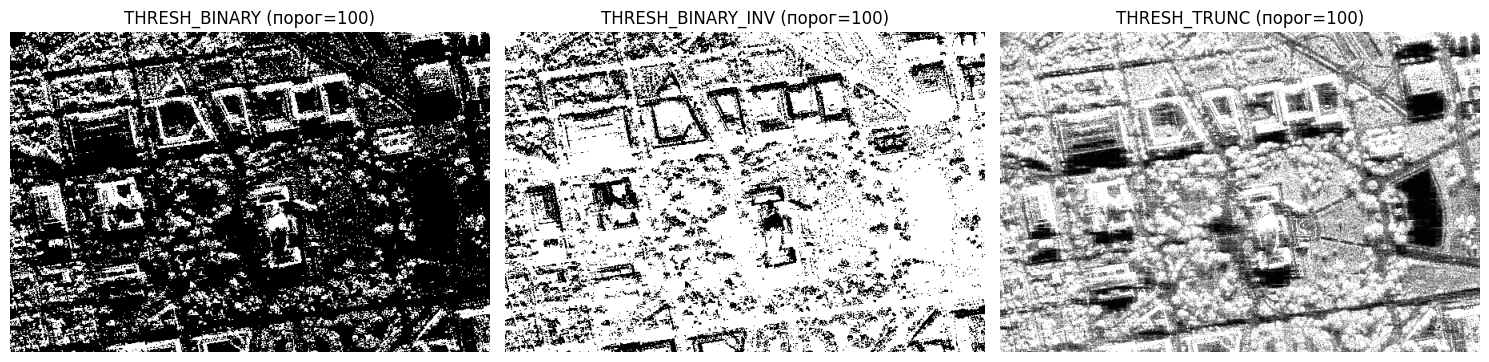

In [10]:
test_threshold = 100

methods = [
    ('THRESH_BINARY', cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV', cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC', cv2.THRESH_TRUNC),
]

plt.figure(figsize=(15, 5))

for i, (method_name, method_type) in enumerate(methods):
    _, result = cv2.threshold(image_gray, test_threshold, 255, method_type)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(result, cmap='gray')
    plt.title(f'{method_name} (порог={test_threshold})')
    plt.axis('off')

plt.tight_layout()
plt.show()